In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/spambase_csv.csv")

In [ ]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-1945366066.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:

label_encoder = LabelEncoder()
binary_cols = [col for col in df.select_dtypes(include='object') if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

multi_cols = [col for col in df.select_dtypes(include='object') if col not in binary_cols]
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)


In [ ]:

target_col = 'class'  # CHANGE THIS
X = df.drop(target_col, axis=1)
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [ ]:
def evaluate_classifier(model, X_data, y_true, name="Set"):
    y_pred = model.predict(X_data)
    print(f"--- {name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_true, y_pred, average='weighted'))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_classifier(model, X_val, y_val, "Validation")
evaluate_classifier(model, X_test, y_test, "Test")


--- Validation ---
Accuracy : 0.8898550724637682
Precision: 0.8900241870526513
Recall   : 0.8898550724637682
F1 Score : 0.8893122744009722

Confusion Matrix:
 [[370  29]
 [ 47 244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       399
           1       0.89      0.84      0.87       291

    accuracy                           0.89       690
   macro avg       0.89      0.88      0.89       690
weighted avg       0.89      0.89      0.89       690

--- Test ---
Accuracy : 0.9160636758321273
Precision: 0.9174148229977067
Recall   : 0.9160636758321273
F1 Score : 0.9153704218446392

Confusion Matrix:
 [[389  16]
 [ 42 244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       405
           1       0.94      0.85      0.89       286

    accuracy                           0.92       691
   macro avg       0.92      0.91      0.91    

In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.90010858 0.90434783 0.91086957 0.90652174 0.78043478]
Mean accuracy: 0.8804564981352971


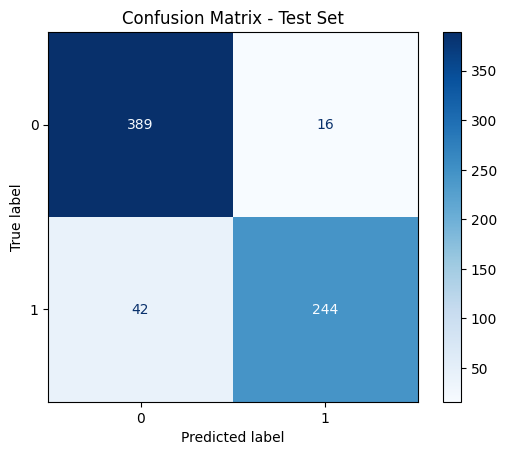

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()


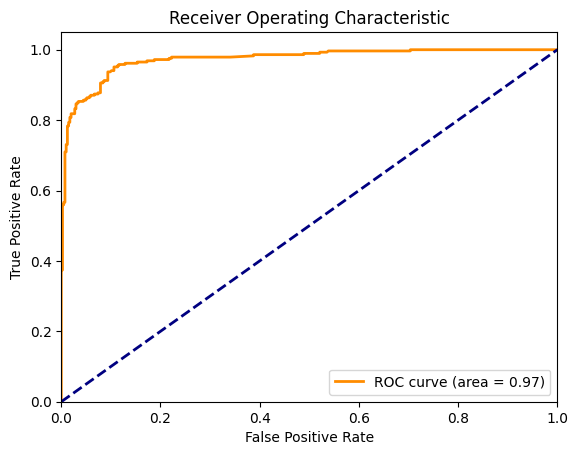

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()